In [1]:
import matplotlib.pyplot as plt

# Set parameters

In [2]:
# declear array
r = []
phi = []

# define schalar
D_mass      = 2.05e-5 # temporary
rho         = 1.00e+0 # temporary
heat_source = 0.00e+0

# define grid scale
total_length = 1.00e+0
num_grid     = 101
dx           = total_length/(num_grid-1)

# define time scale
start_time      = 0.00e+0
end_time        = 1.00e+0
dt              = 1.00e-3

# Initalize grid and phi

In [3]:
# set grid posisions
for i in range(num_grid):
    r.append(i*dx)

In [4]:
# initialize phi
for i in range(num_grid):
    if i < num_grid*0.2:
        phi.append(1.00e+0)
    else:
        phi.append(0.00e+0)

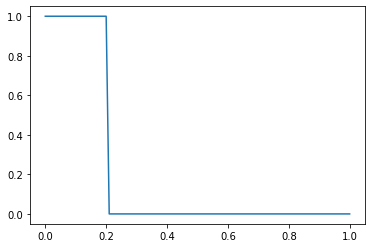

In [5]:
plt.plot(r, phi)

# Define a function of coefficent calculation
see Patanker 4.3-3  
modified to spherical cordinate

In [6]:
# Calclate coefficient of discretized equation
def calc_coef(i):
    # center boundary
    if i == 0:
        a_i = 1
        b_i = 0
        c_i = 0
        d_i = 0
        
    # outer boundary
    elif i == num_grid-1:
        a_i = 1
        b_i = 0
        c_i = 0
        d_i = 0
    
    # internal grids
    else:
        r_e = 0.5*(r[i+1] + r[i])
        r_w = 0.5*(r[i-1] + r[i])
        dx_e = r[i+1] - r[i]
        dx_w = r[i] - r[i-1]
    
        a_E = r_e**2*D_mass/dx_e
        a_W = r_w**2*D_mass/dx_w
        a_P_0 = (r_e**3 - r_w**3)/(3*dt)
        a_P = a_P_0 + a_E + a_W    
    
        a_i = a_P
        b_i = a_E
        c_i = a_W
        d_i = a_P_0*phi[i]
    
    return a_i, b_i, c_i, d_i

# TDAM
see Patanker 4.2-7

In [7]:
def calc_tdma():
    P = []
    Q = []

    # step 1: calculate P[0] and Q[0]
    a_0, b_0, c_0, d_0 = calc_coef(0)
    P.append(b_0/a_0)
    Q.append(d_0/a_0)

    # step 2: calculate P[i] and Q[i]
    for i in range(1,num_grid):
        # call coefficent calculation
        a_i, b_i, c_i, d_i = calc_coef(i)
    
        P_temp = b_i/(a_i - c_i*P[i-1])
        Q_temp = (d_i + c_i*Q[i-1])/(a_i - c_i*P[i-1])
        P.append(P_temp)
        Q.append(Q_temp)

    # step 3: substitute Q[N] to phi[N]
    phi[num_grid-1] = Q[num_grid-1]

    # step 4: calcrate phi[i]
    for i in reversed(range(num_grid-1)):
        phi[i] = P[i]*phi[i+1] + Q[i]

# Time evolution

<IPython.core.display.Javascript object>


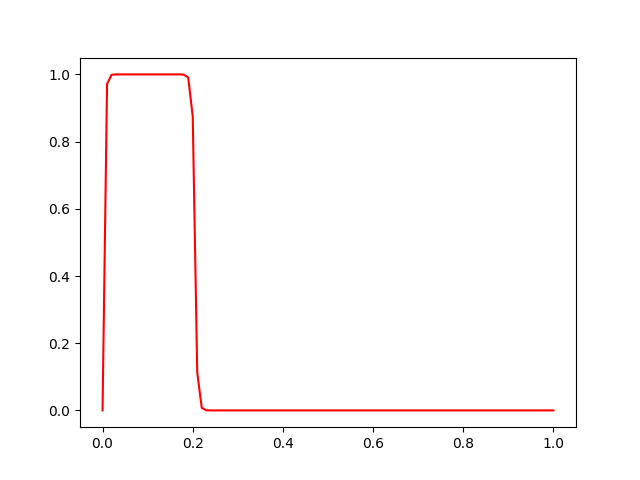

In [8]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

ims = []    
time = start_time
while time < end_time:
    calc_tdma()
    im = plt.plot(r, phi, 'r')
    ims.append(im)
    
    time += dt

ani = animation.ArtistAnimation(fig, ims)
plt.show()